The objective for Data Analysis: I will be assuming the role of a data analyst in an e-commerce company that operates overall multiple regions with multiple product skews. The goal of this data analysis is to understand more about the sales performance of various products.
The data analysis will take three steps:
Step 1: Cleaning the data.
	This will involve removing missing values and outliers.
Step 2: Transforming the data.
	This will involve adding new columns and modifying data to make it easier for analysis.
Step 3: Analyzing the data.
	This will involve analyzing the data at an overall VP level and analyzing the data at a regional sales manager level.
Each step will have its own description before it starts. Furthermore, each line of code will be annotated to explain its purpose. Also any assumptions that are made will be stated.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats

The above line of code is necessary to import pandas, seaborn, numpy, matplotlib, math, and scipy numpy which are the packages required for this analysis.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ajkam/schulich_data_science/main/Assignments/sales_data%20(1)%20-%20Copy.csv")

The above line of code is used to read the excel file store on github and store into a dataframe titled 'df'. 

In [ ]:
df

print the dataframe

In [ ]:
df.info()

display info on the dataframe

In [ ]:
df.describe(include='all')

describe some statistics regarding the datrame

Step 1: Cleaning the data.

The data analysis will help the sales managers and sales VP come up with an efficient strategy for the 2025 sales year. Before coming up with those questions to answer, visualizing observations, and recommending actions, I will start by cleaning the dataset. 

The idea of cleaning this dataset is to ensure that someone coming into this code for the first time will be able to understand precisely what variables I removed and why I did so. I would also like the guarantee that if they need to make modifications to my analysis due to new information on values or rerun the same analysis for themselves, they will have the means to do so within the code.

The issue of tackling missing data will be solved by deciding to replace and fill in the values.
If the missing data is numerical then the data should be filled with an appropriate value-based central limit theory. This is because it will not affect the spread of the data. 

If the missing data is categorical, then the data should be removed for the purpose of the analysis. This is because filling these values with an appropriate value based on the central limit theory would affect the spread of data without contributing additional insights as the soultion would be to add new categorical variables for undefined and missing values.

The next part would be to take care of outliers. To identify if there are outliers histograms, boxplots, and scatterplots will be used to determine if the data has outliers. Then based on central limit theory they will be removed from the analysis.


In [ ]:
column_dict = {'Product':'product_sku', 'Region':'region','Price':'price_per_unit', 
               'Units Sold':'units_sold','Sale Date':'sale_date' }
df= df.rename(columns=column_dict)
df

Create a list of  the old column headings and new easier to work with headings
use the rename function to replace the column headings. Note that an assumption was made that the Price column represented price per unit.

In [ ]:
df.isna().sum()

Use the isna function to check if their any missing values in each column and sum the total number of missing values.

In [ ]:
print(df.isna().any())


Use the boolean function .any to check if the dataframe columns has any missing values so its easy to compare with down the line.

In [ ]:
print(df.isnull())

Print the data set with the boolean function isnull to see true and false for where data is missing.

In [ ]:
sns.histplot(df['units_sold'])

Create a histogram for the units_sold column to see how it is distributed. Based on the output it seems that is normally distributed with no skewness.

In [ ]:
data =df['units_sold']


Create a temporary dataframe called data with the units sold column to check kurtosis and skewness.

In [ ]:
print("Kurtosis (scipy): ", scipy.stats.kurtosis(data, fisher=True))


Use the scipy.stats.kurtosis to check the kurtosis value.
Since it is positive yet very close to zero the data is very slightly peaked.

In [ ]:
def skewness(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    std_dev = math.sqrt(variance)
    
    skewness = sum((x - mean) ** 3 for x in data) / (n * std_dev ** 3)
    return skewness

Create a formula using the length of the data, the mean of the data divided by length, the variance which is calculated by getting the total sum of squares, and then the standard deviation which is the square root of variance.

The calculate the skewneness which is sum each datapoint subratec the mean cubed divied by the standard deviation.

In [ ]:
print(skewness(data))


Based on the above return the skewness. Since the skew is between -0.5 and 0.5 that data is not skewed positively or negatively.

In [ ]:
units_sold_mean = df['units_sold'].mean()


Since it is normally distriubted with no skewness I have determined the best approach is to fill the missing data with the mean. So this function uses the .mean() function to get the mean of units sold and store the value in units_sold_mean.

In [ ]:
df['units_sold'].fillna(value=units_sold_mean, inplace= True)

This uses the fillna function to replace empty values in units_sold with the units_sold_mean value. The inplace argument is left as True so the change is permanent.

In [ ]:
sns.histplot(df['units_sold'])

We dispaly the histogram again to view the change as a new column that is over a count of 200 is a direct result of filling in the missing values we saw earlier.

In [ ]:
df.describe(include='all')

We run the describe function to check if the mean has changed and it has not.

In [ ]:
sns.histplot(df['price_per_unit'])

Create a histogram for the price_per_unit column to see how it is distributed. Based on the output it seems that the data skewed to the left.

In [ ]:
data2 =df['price_per_unit']

Create a temporary dataframe called data2 with the price_per_unit column to check kurtosis and skewness.

In [ ]:
print("Kurtosis (scipy): ", scipy.stats.kurtosis(data2, fisher=True))

Use the scipy.stats.kurtosis to check the kurtosis value.
Since it is positive and greater than 3 this indicates a leptokurtic distriubtion. This means the data has very thick tails, with a high concentration of data around the tails, and there is a high chance of outliers. This means we should be careful when removing outliers.

In [ ]:
def skewness(data2):
    n = len(data2)
    mean = sum(data2) / n
    variance = sum((x - mean) ** 2 for x in data2) / n
    std_dev = math.sqrt(variance)
    
    skewness = sum((x - mean) ** 3 for x in data2) / (n * std_dev ** 3)
    return skewness

Create a formula using the length of the data, the mean of the data divided by length, the variance which is calculated by getting the total sum of squares, and then the standard deviation which is the square root of variance.

The calculate the skewneness which is sum each datapoint subratec the mean cubed divied by the standard deviation.

In [ ]:
print(skewness(data2))

Based on the above return the skewness. Since the skew is greater than 1 the data is extremely positivley skewed. This means that there is a huge tail on the right hand side of the data.

In [ ]:
price_per_unit_median = df['price_per_unit'].median()

Since there the data is extremely positively skewed I have determined the best approach is to fill the missing data with the median. So this function uses the .median() function to get the median of price_per_unit and store the value in price_per_unit_median

In [ ]:
df['price_per_unit'].fillna(value=price_per_unit_median, inplace= True)

This uses the fillna function to replace empty values in price_per_unit with the price_per_unit_median value. The inplace argument is left as True so the change is permanent.

In [ ]:
sns.histplot(df['price_per_unit'])

We dispaly the histogram again to view the change as a large column that is over a count of 175 that is a direct result of filling in the missing values we saw earlier.

In [ ]:
df.describe(include='all')

We run the describe function to check if the mean has changed and it has but only 3 units of the currency the price is in.

In [ ]:
df.drop_duplicates(inplace=True)

We use the drop_duplicates value to see drop any values that are the exact same. This is to account for any entry error.

In [ ]:
print(df.isna().any())

We print to ensure the values we just filled are in the dataset. Since price_per_unit and units_sold return false they have been filled.

In [ ]:
df_storage = df['product_sku'].fillna("sku_undefined")
df_storage = df['region'].fillna("region_missing")

This code fills the missing product_sku and missing region with text values and stores them in a dataset in df_storage. This is so if someone from the internal side of the company can look in the code fill in those missing variables and re run the dataset they can do it within the code. They would not have to input the values into the excel stored on github as they could enter them directly into df_storage.

In [ ]:
print(df.isna().any())


This code checks to ensure that product_sku and regions are still missing values in 'df'. This is because we do not believe they are unusable for the analysis detailed at the beginning due to the missing values.

In [ ]:
print(df_storage.isna().any())

This code checks that dataframe storage has no missing values.

In [ ]:
df.dropna(inplace=True)

This code then drops the missing values in product_sku and region. This is because I do not believe this data is useful for the data analysis. If they are listed as underfined and other they will not contribute to making insights for specific product performance. 

In [ ]:
df

We print the dataframe again cause we have not seen it in awhile just to check.

In [ ]:
print(df.isna().any())

This code checks that dataframe 'df' has no missing values.

In [ ]:
df.info()

We print some basic info that mainly shows us that we are now at 810 entries from the initial 1050. This means we have cleared about 240 entries from the data.

In [ ]:
df.describe(include='all')

We print some statistics and see that our mean for both units_sold and price_per_unit have changed slightly.

In [ ]:
sns.histplot(df['price_per_unit'])

We noticed above that their was an outlier in the histogram and now we are going to treat it.

In [ ]:
df[df['price_per_unit']>2000]

We isolate for any indexes above 2000 and we find index 969.

In [ ]:
df.drop(969, axis=0, inplace=True)

We drop index 969 from the dataplace permanently with the drop function and inplace = True.

In [ ]:
sns.histplot(df['price_per_unit'])

We print our new histogram to see that we have removed the outlier.

In [ ]:
sns.histplot(df['units_sold'])

We repeat the same process with units_sold to check for outliers.

In [ ]:
df[df['units_sold']>20]

We isolate for indexes above 20 and find index 719.

In [ ]:
df.drop(719, axis=0, inplace=True)

We drop index 969 from the dataplace permanently with the drop function and inplace = True.

In [ ]:
sns.histplot(df['units_sold'])

We print our new histogram to see that we have removed the outlier.

In [ ]:
sns.boxplot(data = df, x = 'price_per_unit')

We print a boxplot to check if their are any more outliers in the data. We come across a lot of data being greater than 300 which approximatley the upper extreme of the whisker.

In [ ]:
df[df['price_per_unit']>300]

We isolate those under 300 and determine there are a lot of indices above 300 and decide to come back to analyze it further using a different plot.

In [ ]:
sns.boxplot(data = df, x = 'units_sold')

We create a boxplot of the units_sold which presents a more reasonable boxplot since it is normally distributed.

In [ ]:
df[df['units_sold']>18]

We isolate for units above the upper extreme and find some indices.

In [ ]:
df.drop(df[df['units_sold']>18].index, axis=0, inplace=True)


We decide to use the drop function to permanently drop all indices that met the boolean of being greater than 18 using inpalce=True to make it permanent.

In [ ]:
sns.boxplot(data = df, x = 'units_sold')

We remake the boxplot to show no more outliers.

In [ ]:
sns.scatterplot(data=df, x='units_sold',y='price_per_unit')

We create a scatterplot to see if we can further find outliers in price_per_unit or if the boxplot was just misdjuding due the data being skewed to the left.

In [ ]:
sns.lmplot(data=df, x='price_per_unit',y='units_sold', fit_reg=True)

We create a scatterplot with a line of best and a different orientation to see if we can further enhance the findings from the scatterplot.

In [ ]:
df[df['price_per_unit']>550]

Based on the two scatterplots and the boxplot there seems to be a cluster data from 300 to 550. However past 550 there are only a few datapoints. Therefore the conclusion is to isolate for indices greater than 550.

In [ ]:
df.drop(df[df['price_per_unit']>550].index, axis=0, inplace=True)

This conclusion seems much more reasonable than the number of outliers concluded from the sole analysis of the boxplot. Therefore we will use the drop function to permanaently drop any index above 550 using inplace=True to ensure it is permanent.

In [ ]:
sns.lmplot(data=df, x='price_per_unit',y='units_sold', fit_reg=True)

We reprint scatter plot with line of best fit to ensure the data looks good.

In [ ]:
df.info()

We run the info function to determine that we now have 799 entries. This means we have cleaned about 11 entries from the 810. In total we have cleaned 11+240=251 entries from the orignal data set of 1050 entries.

In [ ]:
df.describe(include='all')

Now that we have removed our outliers we can see that the units_sold mean has marginally changed from the initial 10.04 to 10.03. While the price_per_unit mean slightly decreased from the initial 107.59 to 98.03. We make a careful note that this was due to removing & filling missing data, dropping duplicates, removing outliers.

Step 2 and 3:
I will transform the data based on the following questions I want to answer. Then I will use the data to visualize the observations. These observations will take two categories. Firstly, the data of summary statistics will be organized and visualized to figure out the big-picture decisions on a department-wide and regional sales level. Secondly, specific product-by-region recommendations will be made according to the recommendation matrix to find the specific fixes for the sales performance of products on department-wide and regional sales levels. The table is located in the attached microsoft document.


In [ ]:
print(df['product_sku'].unique())

Firstly I want to prepare the data so that the labels are shorter and taht they can be sorted numerically so I am going to print a unique list of product_sku.

In [ ]:

df = df.replace(['Product_46', 'Product_36', 'Product_17', 'Product_45', 'Product_31',
 'Product_18', 'Product_16', 'Product_9', 'Product_20', 'Product_1',
 'Product_2', 'Product_3', 'Product_43', 'Product_33', 'Product_14',
 'Product_50', 'Product_6', 'Product_13', 'Product_11', 'Product_27',
 'Product_28', 'Product_24', 'Product_34', 'Product_25', 'Product_4',
 'Product_48', 'Product_10', 'Product_49', 'Product_12', 'Product_42',
 'Product_5', 'Product_26', 'Product_8', 'Product_37', 'Product_22',
 'Product_32', 'Product_23', 'Product_35', 'Product_15', 'Product_29',
 'Product_44', 'Product_47', 'Product_41', 'Product_39', 'Product_30',
 'Product_40', 'Product_21', 'Product_38', 'Product_19', 'Product_7'], [46, 36, 17, 45, 31,
 18, 16, 9, 20, 1,
 2, 3, 43, 33, 14,
 50, 6, 13, 11, 27,
 28, 24, 34, 25, 4,
 48, 10, 49, 12, 42,
 5, 26, 8, 37, 22,
 32, 23, 35, 15, 29,
 44, 47, 41, 39, 30,
 40, 21, 38, 19, 7]
)

df

Then I am going to replace the string Product_#X with the integer #X.

In [ ]:
df.sort_values(by=['product_sku'], ascending=True,inplace=True)
df

Then I am going to sort by product_sku.

In [ ]:
print(df['region'].unique())

I am going to do the same with the labels for Region starting printing a list of unique values.

In [ ]:
df = df.replace(['Region_3', 'Region_1', 'Region_6', 'Region_7', 'Region_9', 'Region_2',
 'Region_4', 'Region_5', 'Region_8', 'Region_10'], [3, 1, 6, 7, 9, 2,
 4, 5, 8, 10] 
)
df

I am replacing the string Region_#X with the integer #X.

In [ ]:
df.sort_values(by=['region'], ascending=True,inplace=True)
df

Then I am going to sort by region.

In [ ]:
columns_titles = ["region","product_sku","price_per_unit","units_sold","sale_date"]
df=df.reindex(columns=columns_titles)
df

I decided that for my analysis it would better to have region first so I reindexed the columns accordingly.

In [ ]:
print(df.groupby('product_sku')['units_sold'].mean())

In [ ]:
df['year_sold'] = pd.DatetimeIndex(df['sale_date']).year
df['month_sold'] = pd.DatetimeIndex(df['sale_date']).month
df['quarter_sold'] = pd.DatetimeIndex(df['sale_date']).quarter
df['sales_revenue'] = df['units_sold'] * df['price_per_unit']
df['CW_units_sold'] = df.groupby('product_sku')['units_sold'].transform('mean')
df['CW_price_per_unit'] = df.groupby('product_sku')['price_per_unit'].transform('mean')
df['CW_sales_revenue'] = df.groupby('product_sku')['sales_revenue'].transform('mean')
df['Dif_sales_revenue'] = (df['sales_revenue']- df['CW_sales_revenue'])/df['CW_sales_revenue']
df['Dif_price_per_unit'] = (df['price_per_unit']- df['CW_price_per_unit'])/df['CW_price_per_unit']
df['Dif_units_sold'] = (df['units_sold']- df['CW_units_sold'])/df['CW_units_sold']



def conditions(df):    
    if df['Dif_sales_revenue'] > 0: matrix = 1
    elif df['Dif_sales_revenue'] == 0:     matrix = 0
    elif df['Dif_sales_revenue'] < 0:     matrix = -1
    else: matrix = "ERR"
        
    return matrix

df['mtr_sales_revenue'] = df.apply(conditions, axis=1)


def conditions1(df):    
    if df['Dif_price_per_unit'] > 0: matrix = 1
    elif df['Dif_price_per_unit'] == 0:     matrix = 0
    elif df['Dif_price_per_unit'] < 0:     matrix = -1
    else: matrix = "ERR"
        
    return matrix

df['mtr_price_per_unit'] = df.apply(conditions1, axis=1)

def conditions2(df):    
    if df['Dif_units_sold'] > 0: matrix = 1
    elif df['Dif_units_sold'] == 0:     matrix = 0
    elif df['Dif_units_sold'] < 0:     matrix = -1
    else: matrix = "ERR"
        
    return matrix

df['mtr_units_sold'] = df.apply(conditions2, axis=1)



df


In [ ]:
sns.histplot(df['mtr_sales_revenue'])

The above columns will help me answer my questions in the big picture statistical summary and the detailed product by region recommendation.
The year_sold, month_sold, quarter_sold will help me output summary statistics grouped by a certain time period (year, month, and season/quarter).
The columns with the prefix CW are the company-wide averages of units_sold, price_per_unit, and sales_revenue.
The columns with the prefix Dif are the differential statistics based on much greater or less the units_sold, price_per_unit, and sales_revenue are to the CW versions in decimals.
The columns with the prefix mtr are the boolean operators to determine which scenario each sale falls into based on units_sold, sales_revenue, and price_per_unit. To create these columns I created a variable called conditions. Then I stated one condition if the differential is greater than zero to return the value "High", if equal to zero then return the value "Avg", and if less than zero to return the value "low" in the next condition. as specified in the matrix table attached.

Step 3: For the VP of sales, I plan to answer to following questions by extracting observations and providing recommendations for the business:

What is the overall performance of the company over the three years of data?
What quarter does the company have best/worst sales?
What was the company’s highest and lowest month?
What was the max and min sales for each year?



<Axes: xlabel='year_sold', ylabel='sales_revenue'>

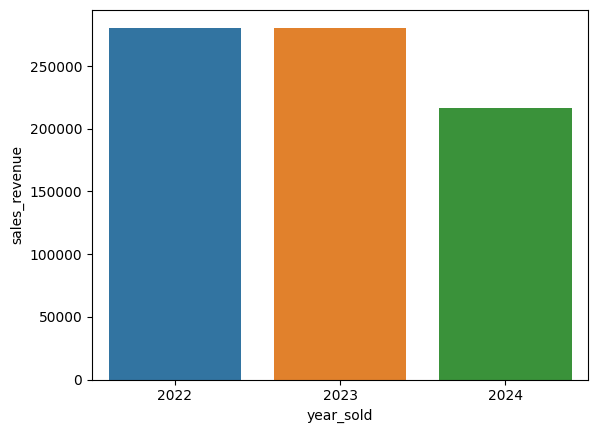

In [540]:
sns.barplot(x='year_sold',y='sales_revenue',data=df, estimator=sum, errorbar=None)


What is the overall performance of the company over the three years of data?

As shown by the data it is difficult so visualize from the barchart of the total revenue to see which year is performing the best. Note that 2024 data only goes up until the third quarter as it ends in September. Looking at the numerical values might help answer this question.

<Axes: xlabel='quarter_sold', ylabel='sales_revenue'>

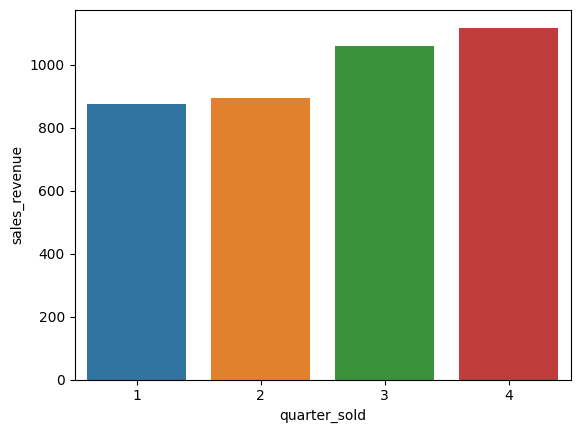

In [542]:
sns.barplot(x='quarter_sold',y='sales_revenue',data=df, errorbar=None)


What quarter does the company have best/worst sales?

Since the data from quarter 4 are missing in 2024. The average was used instead of the sum. This shows that the best quarter is quarter 4. This is important it shows that the last quarter might cause a rush as managers might be scrambling to increase sales as managers want to meet their bonuses. On the other hand the first quarter is the worst on average which demonstrates that after the end of the year sales managers might be relaxed for the first quarter of the new year. The VP of Sales should look into creating bonuses per quarter so regional sales managers are incentived throughout the entire year. However it is important to look into whether this is because sales managers being lax or just due to the holiday season. Typically ecommerce companies have a surge of sales during the Christmas season and then during January very few people are purchasing. Therfore, before deciding on implementing quarterly bonuses the gap between q1 and q4 should invesetigated further to see if it caused by managers or seasonality.

<Axes: xlabel='month_sold', ylabel='sales_revenue'>

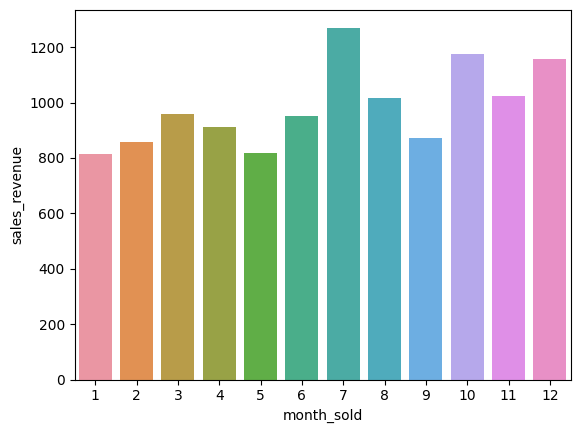

In [544]:
sns.barplot(x='month_sold',y='sales_revenue',data=df, errorbar=None)


What was the company’s highest and lowest month?

This graph visualizes the average sales revenue by month. The top 3 months are July, October, and December. This explains in the previous result why Q4 is the most successful as it has 2 of the top 3 months. The bottom fourr months are September, Jaunary, February, and May. This explains why Q1 is the lowest as it has 2 of the worst months. This again demonstrates the seasonal trend for company. However data from q4 2024 is not included. One recommendation for the VP of Sales might be to employ department wide promotions on the bottom 4 months. This might help increase units_sold although a lower price_per_unit.

In [548]:
df_2022 = df[df["year_sold"]==2022]
df_2022
print("The max sale for 2022 was " + str(df_2022['sales_revenue'].max()))
print("The min sale for 2022 was " + str(df_2022['sales_revenue'].min()))

df_2023 = df[df["year_sold"]==2023]
df_2023
print("The max sale for 2023 was " + str(df_2023['sales_revenue'].max()))
print("The min sale for 2023 was "+ str(df_2023['sales_revenue'].min()))

df_2024 = df[df["year_sold"]==2024]
df_2024
print("The max sale for 2024 was " + str(df_2024['sales_revenue'].max()))
print("The min sale for 2024 was " + str(df_2024['sales_revenue'].min()))

The max sale for 2022 was 5855.360000000001
The min sale for 2022 was 2.2
The max sale for 2023 was 5555.11
The min sale for 2023 was 0.99
The max sale for 2024 was 5100.6
The min sale for 2024 was 14.170000000000002


What was the max and min sales for each year?

The above cell outputs the min and max sale. This reveals some interesting data as their are some abnormally high sales and low sales. For example the min sales in 2023 is less than a dollar which means that price_per_unit was abnormlly low. This should be investigated as it shows that there is no standard guideline for how much discounts are allowed per product. The regional managers are completely out of wack when it comes to charging prices. There needs to be a standard set by the Vice President of Sales at least for a mininum price for each product as this would ensure that the company maeks a profit on each sale. This holds true as unless the 0.99 sale revenue in 2023 and the 2.2 sale revenue in 2022 were a clearance sale it is unlikely that there was a return on investment for those sales.  

In [554]:
df_2022_q1 = df[(df["year_sold"]==2022) & (df["quarter_sold"]==1)]
df_2022_q2 = df[(df["year_sold"]==2022) & (df["quarter_sold"]==2)]
df_2022_q3 = df[(df["year_sold"]==2022) & (df["quarter_sold"]==3)]
df_2022_q4 = df[(df["year_sold"]==2022) & (df["quarter_sold"]==4)]
print("The total sales for Q1 2022 was " + str(df_2022_q1['sales_revenue'].sum()))
print("The total sales for Q2 2022 was " + str(df_2022_q2['sales_revenue'].sum()))
print("The total sales for Q3 2022 was " + str(df_2022_q3['sales_revenue'].sum()))
print("The total sales for Q4 2022 was " + str(df_2022_q4['sales_revenue'].sum()))


df_2023_q1 = df[(df["year_sold"]==2023) & (df["quarter_sold"]==1)]
df_2023_q2 = df[(df["year_sold"]==2023) & (df["quarter_sold"]==2)]
df_2023_q3 = df[(df["year_sold"]==2023) & (df["quarter_sold"]==3)]
df_2023_q4 = df[(df["year_sold"]==2023) & (df["quarter_sold"]==4)]
print("The total sales for Q1 2023 was " + str(df_2023_q1['sales_revenue'].sum()))
print("The total sales for Q2 2023 was " + str(df_2023_q2['sales_revenue'].sum()))
print("The total sales for Q3 2023 was " + str(df_2023_q3['sales_revenue'].sum()))
print("The total sales for Q4 2023 was " + str(df_2023_q4['sales_revenue'].sum()))

df_2024_q1 = df[(df["year_sold"]==2024) & (df["quarter_sold"]==1)]
df_2024_q2 = df[(df["year_sold"]==2024) & (df["quarter_sold"]==2)]
df_2024_q3 = df[(df["year_sold"]==2024) & (df["quarter_sold"]==3)]
df_2024_q4 = df[(df["year_sold"]==2024) & (df["quarter_sold"]==4)]
print("The total sales for Q1 2024 was " + str(df_2024_q1['sales_revenue'].sum()))
print("The total sales for Q2 2024 was " + str(df_2024_q2['sales_revenue'].sum()))
print("The total sales for Q3 2024 was " + str(df_2024_q3['sales_revenue'].sum()))
print("The total sales for Q4 2024 was " + str(df_2024_q4['sales_revenue'].sum()))





The total sales for Q1 2022 was 54715.520422832975
The total sales for Q2 2022 was 59691.78164904862
The total sales for Q3 2022 was 78426.14697674419
The total sales for Q4 2022 was 87867.13570824525
The total sales for Q1 2023 was 65823.15940803383
The total sales for Q2 2023 was 70671.76143763213
The total sales for Q3 2023 was 75156.08617336152
The total sales for Q4 2023 was 68580.46644820296
The total sales for Q1 2024 was 73894.73274841438
The total sales for Q2 2024 was 69174.29687103594
The total sales for Q3 2024 was 73161.15659619455
The total sales for Q4 2024 was 0.0


What quarter does the company have best/worst sales?

This question was already answered with a visualization. However a recommendation of addng bonsuses per quarter to motivate managers was suggested.

For 2022 Q4 had the highest sales. For 2023 Q3 had the highest sales. For 2024 noting missing Q4 Q1 had the highest sales.

Depedning on how the data for Q4 turns it it seems that the highest sales are concentrated in Q3 and Q4. This would support the decision to have a quarterly bonus so the VP of sales can motivate the regional sales managers throughout the year.

In [559]:
print("The total sales for 2022 was " + str(df_2022['sales_revenue'].sum()))
print("The total sales for 2023 was " + str(df_2023['sales_revenue'].sum()))
print("The total sales for 2024 was " + str(df_2024['sales_revenue'].sum()))

x= (df_2022_q4['sales_revenue'].sum() + df_2023_q4['sales_revenue'].sum())/2
print(x)
print("If the company perfomrs at their average sales for the past two years they will surpass 2023 sales with a 2024 total of " + 
      str(x + df_2024['sales_revenue'].sum()))

The total sales for 2022 was 280700.58475687105
The total sales for 2023 was 280231.47346723045
The total sales for 2024 was 216230.18621564482
78223.8010782241
If the company perfomrs at their average sales for the past two years they will surpass 2023 sales with a 2024 total of 294453.9872938689


What is the overall performance of the company over the three years of data?

Earlier a visualization was used to attempt to answer this question. It was unclear because the first two datapoints were so close and the 2024 datapoint was much lower so the visualization scale was not able to demonstrate it properly. So the numeric data shows that sales decreased from 2022 to 2023 which shows a slight dip in performance. However if their quarter 4 remains on track based on the average of the past two years they will surpass their performance.

In [ ]:
sns.barplot(x='region',y='sales_revenue',data=df, estimator=sum, errorbar=None)


In [ ]:
sns.barplot(x='region',y='sales_revenue',data=df_2022, estimator=sum, errorbar=None)


In [ ]:
sns.barplot(x='region',y='sales_revenue',data=df_2023, estimator=sum, errorbar=None)


In [ ]:
sns.barplot(x='region',y='sales_revenue',data=df_2024, estimator=sum, errorbar=None)


Break

In [ ]:
t = sns.barplot(x='product_sku',y='sales_revenue',data=df, estimator=sum, errorbar=None)
t.tick_params(labelsize=5)


In [ ]:
t = sns.barplot(x='product_sku',y='sales_revenue',data=df_2022, estimator=sum, errorbar=None)
t.tick_params(labelsize=5)

In [ ]:
t = sns.barplot(x='product_sku',y='sales_revenue',data=df_2023, estimator=sum, errorbar=None)
t.tick_params(labelsize=5)

In [ ]:
t = sns.barplot(x='product_sku',y='sales_revenue',data=df_2024, estimator=sum, errorbar=None)
t.tick_params(labelsize=5)

In [ ]:
p = df.pivot_table(index='product_sku', columns='region', values=['mtr_sales_revenue',
                                                                  'mtr_price_per_unit', 
                                                                  'mtr_units_sold'])
p

In [ ]:
regioninput = input("Welcome Regional Manageer. Please enter your region between 1 to 10")
regiondataframe= "df_" + str(regioninput)
print(regiondataframe)
type(regiondataframe)

In [ ]:
regiondataframe = df[df["region"]==int(regioninput)]
regiondataframe

In [ ]:
p = regiondataframe.pivot_table(index='product_sku', columns='region', values=['mtr_sales_revenue',
                                                                  'mtr_price_per_unit', 
                                                                  'mtr_units_sold'])
p

In [ ]:
sns.barplot(x='year_sold',y='sales_revenue',data=regiondataframe, estimator=sum, errorbar=None)

In [ ]:
sns.barplot(x='month_sold',y='sales_revenue',data=regiondataframe, estimator=sum, errorbar=None)


In [ ]:
sns.barplot(x='quarter_sold',y='sales_revenue',data=regiondataframe, estimator=sum, errorbar=None)
